In [ ]:
import mplfinance as mlf
import pandas as pd

'0.12.10b0'

In [4]:
#更正式的转换Date为Timestam的方法
data=pd.read_csv("SPY_20110701_20120630_Bollinger.csv")

data=data.set_index('Date')
data

,Open,High,Low,Close,Adj Close,Volume,UpperB,LowerB,PercentB
Date,,,,,,,,,
2011-07-01,132.089996,134.100006,131.779999,133.919998,117.161659,202385700,132.373927,125.316073,1.219057
2011-07-05,133.779999,134.080002,133.389999,133.809998,117.065437,165936000,133.254297,124.912703,1.066618
2011-07-06,133.490005,134.139999,133.110001,133.970001,117.205429,143331600,134.040915,124.627085,0.992467
2011-07-07,135.160004,135.699997,134.880005,135.360001,118.421478,170464200,135.077014,124.284986,1.026222
2011-07-08,133.830002,135.360001,133.389999,134.399994,117.581619,194100500,135.721110,124.140890,0.885916
...,...,...,...,...,...,...,...,...,...
2012-06-25,132.050003,132.100006,130.850006,131.320007,117.327911,146375700,136.498567,128.120436,0.381896
2012-06-26,131.699997,132.380005,130.929993,131.979996,117.917580,141634000,136.362697,128.084306,0.470585
2012-06-27,132.419998,133.429993,131.970001,133.169998,118.980804,108088000,136.447962,128.140042,0.605441


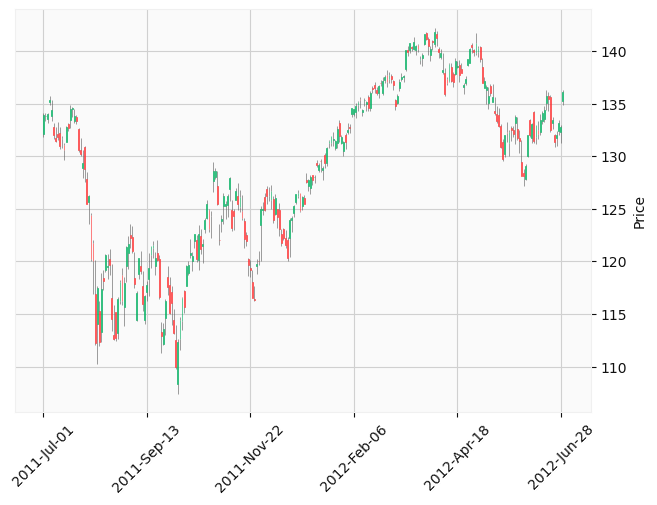

In [39]:
mlf.plot(data,type='candle',style='yahoo')#candle图格式,同时指定style

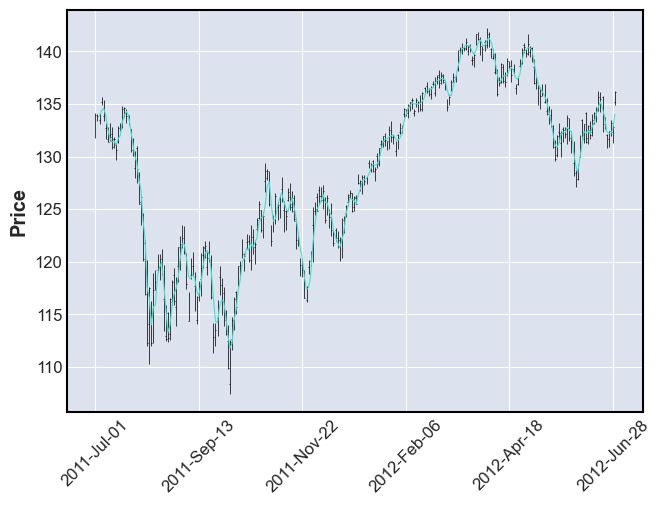

In [40]:
mlf.plot(data,mav=3)#三日平均值

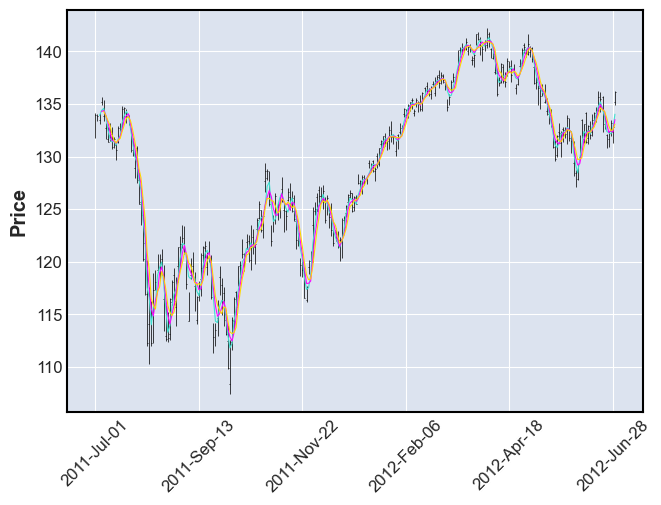

In [41]:
mlf.plot(data,mav=(3,4,5))#三、四、五日平均值

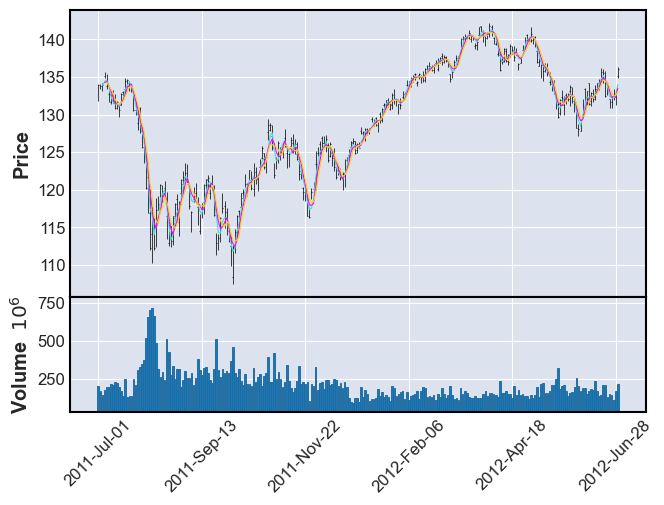

In [42]:
mlf.plot(data,mav=(3,4,5),volume=True)#增添Volume

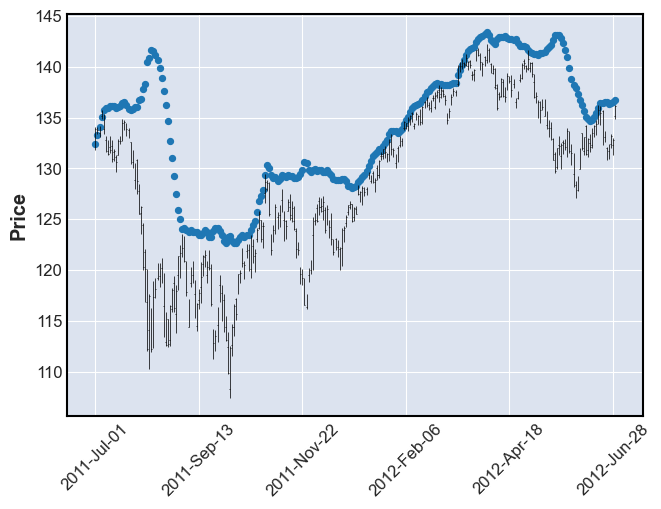

In [43]:
#添加一个图像,指定画图类型
man=mlf.make_addplot(data['UpperB'],type='scatter')
mlf.plot(data,addplot=man)

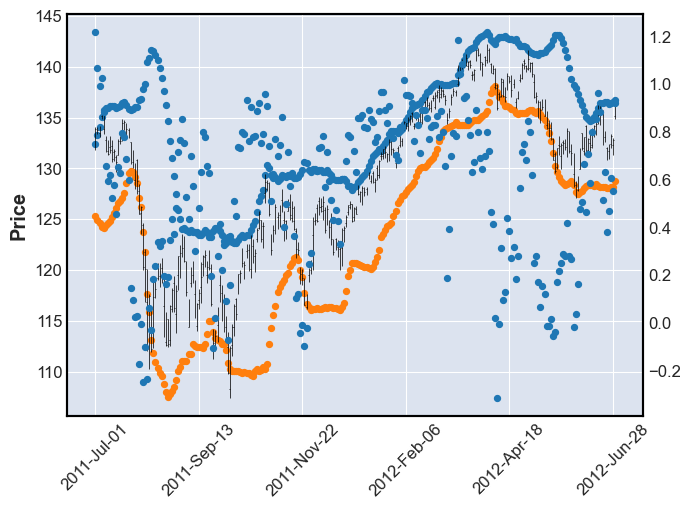

In [44]:
#添加多个图像
drawing_list=[
    mlf.make_addplot(data['UpperB'],type='scatter'),
    mlf.make_addplot(data['LowerB'],type='scatter'),
    mlf.make_addplot(data['PercentB'],type='scatter')
]
mlf.plot(data,addplot=drawing_list)

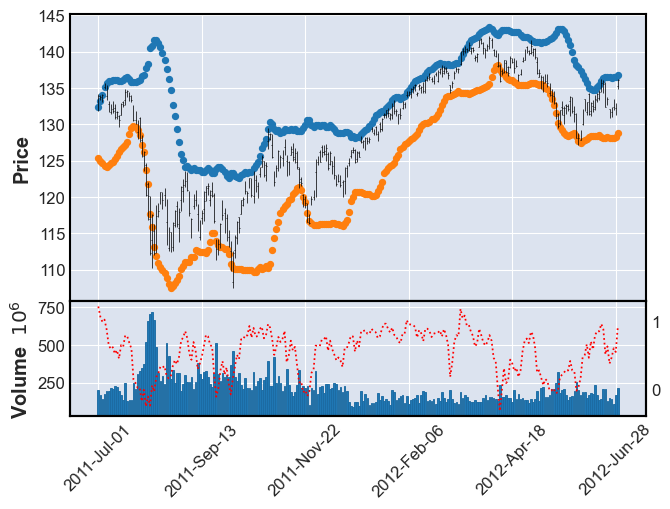

In [45]:
#在下方的图像上画额外的图,设定颜色,设定线条主题
drawing_list=[
    mlf.make_addplot(data['UpperB'],type='scatter'),
    mlf.make_addplot(data['LowerB'],type='scatter'),
    mlf.make_addplot(data['PercentB'],type='line',linestyle='dotted',panel=1,color='r')
]
mlf.plot(data,addplot=drawing_list,volume=True)

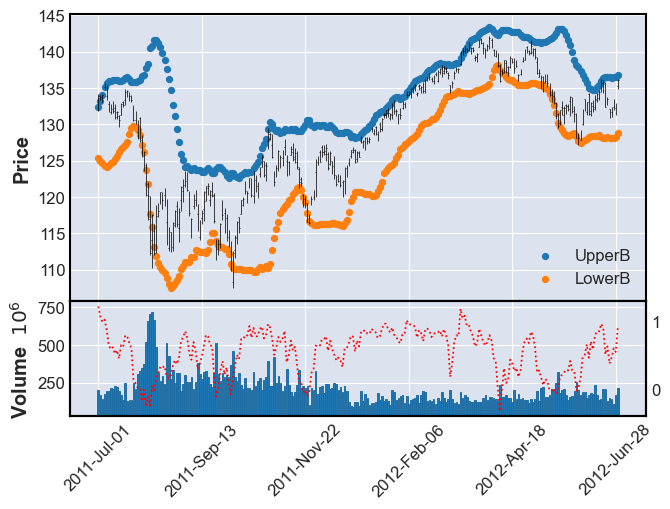

In [46]:
#在上一张图的基础上增加legend
drawing_list=[
    mlf.make_addplot(data['UpperB'],type='scatter',label='UpperB'),
    mlf.make_addplot(data['LowerB'],type='scatter',label='LowerB'),
    mlf.make_addplot(data['PercentB'],type='line',linestyle='dotted',panel=1,color='r')
]
mlf.plot(data,addplot=drawing_list,volume=True)

### 制作mplfinance主题,包含三部分（marketcolors、mavcolors、matplotlib style）
#### 第一部分：marketcolor(蜡烛图涨跌实心颜色，灯芯颜色，量图颜色，ohlc格式图颜色)
每个关键字 edge、wick、ohlc 和 volume 都可以有以下值：
1. 任何一种 matplotlib 颜色
2. 为 "向上 "和 "向下 "分别指定颜色的 dict
3. 字符串 "inherit"（或其任意部分："i"、"in"、"inh "等），表示关键字（edge、wick、ohlc、volume）应使用与关键字 up 和 down 指定的相同颜色。

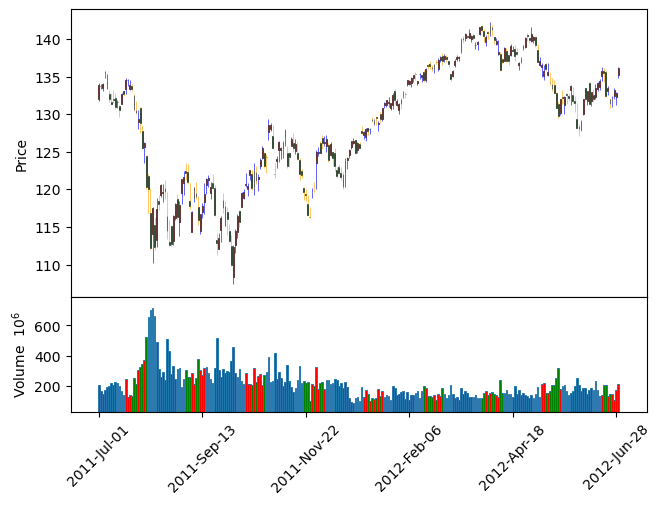

In [47]:
mc=mlf.make_marketcolors(up='r',down='g',wick={'up':'blue','down':'orange'},volume='in')
s=mlf.make_mpf_style(marketcolors=mc)
mlf.plot(data,type='candle',style=s,volume=True)#candle图格式,同时指定style

#### 第二部分：mavcolors
在make_mpf_style()函数中的mavcolors参数设置，是一个含matplotlib颜色的列表,用来指定平均线的颜色

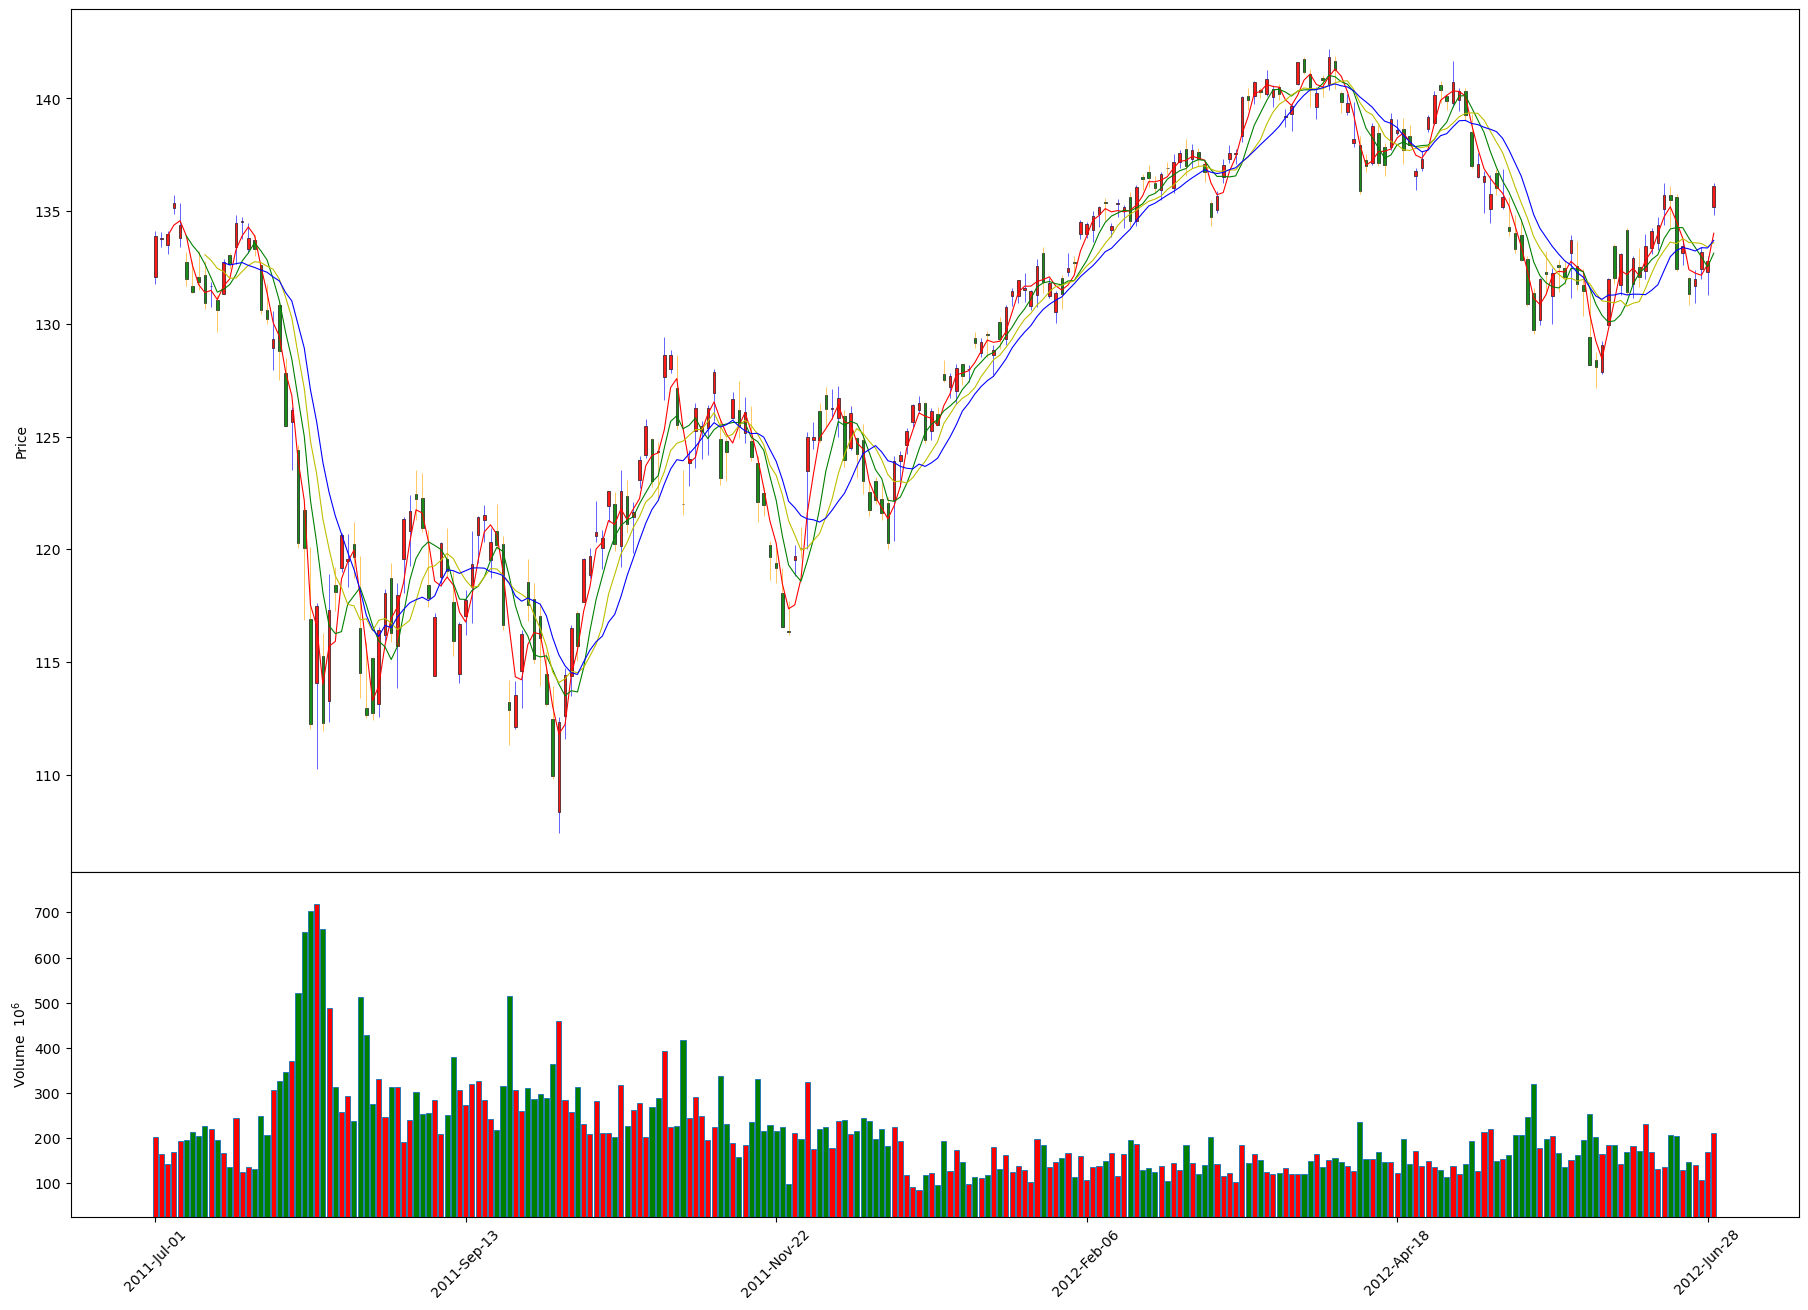

In [48]:
mc=mlf.make_marketcolors(up='r',down='g',wick={'up':'blue','down':'orange'},volume='in')
s=mlf.make_mpf_style(marketcolors=mc,mavcolors=['r','g','y','b'])
mlf.plot(data,type='candle',style=s,volume=True,mav=(3,6,9,12),figscale=3)

#### 第三部分：matplotlib style
由`base_mpf_style`和`base_mpl_style`两个参数决定。他们在make_marketcolors和make_mpf_style函数中均可用，相当于直接继承。

In [49]:
#可用的matplotlib style包括：
#import matplotlib
#matplotlib.style.available

## Panel方法制作管理子图
#### 1.指定主图与其他图位置。（主图是进行蜡烛图或OHLC图绘制的板块）

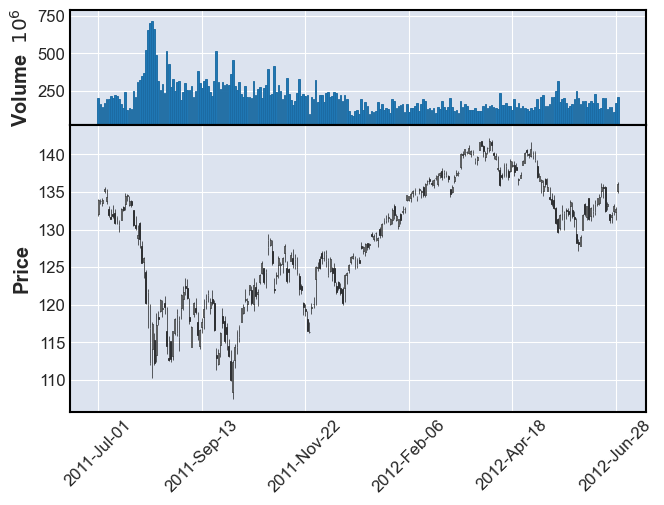

In [50]:
mlf.plot(data,type='candle',volume=True,main_panel=1,volume_panel=0)

#### 2.指定主图和其他图的大小比例

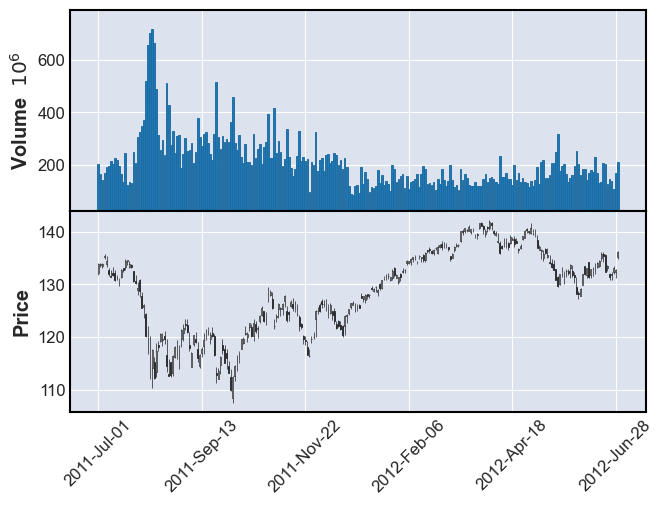

In [51]:
mlf.plot(data,type='candle',volume=True,main_panel=1,volume_panel=0,panel_ratios=(1,1))

### 3.新开一个panel，添加新的图,设置各个图片的大小

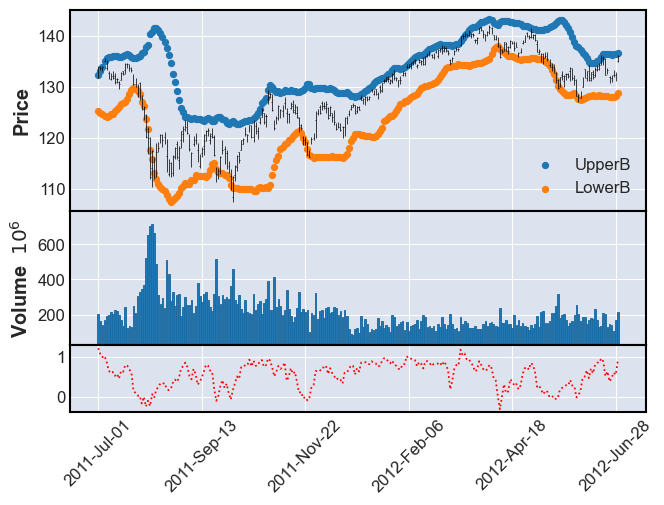

In [52]:
drawing_list=[
    mlf.make_addplot(data['UpperB'],type='scatter',label='UpperB'),
    mlf.make_addplot(data['LowerB'],type='scatter',label='LowerB'),
    mlf.make_addplot(data['PercentB'],type='line',linestyle='dotted',color='r',panel=2)
]
mlf.plot(data,addplot=drawing_list,volume=True,panel_ratios=(3,2,1))

### 常用指标
#### 1.EMA
$EMA(n,i)=\frac{2}{n+1}X_i+\frac{n-1}{n+1}EMA(n,i-1)$<br>
NOTE；EMA（n,1）=$X_{1}$ <br>
具体计算实现应直接使用dataframe.ewm()函数。<br>
然而同时应该注意，ewm()函数能够实现的不仅EMA。<br>
ewm函数实际上是在实现这个式子：$y_t=(1-\alpha)y_{t-1}+\alpha x_t$
<br>
同时ewm()函数的参数则具体表达了计算方法（$\alpha 实际上能够发生改变$）,但是ewm函数不能指定计算长度

In [53]:
data['Close'].ewm(alpha=0.5,adjust=False).mean()#ewm()函数直接得到的是一个滑动窗口，必须使用聚合函数
data['Close'].ewm(span=12,adjust=False).mean()

Date
2011-07-01    133.919998
2011-07-05    133.903075
2011-07-06    133.913371
2011-07-07    134.135930
2011-07-08    134.176555
                 ...    
2012-06-25    133.055614
2012-06-26    132.890134
2012-06-27    132.933190
2012-06-28    132.911160
2012-06-29    133.401751
Name: Close, Length: 252, dtype: float64

##### 作图

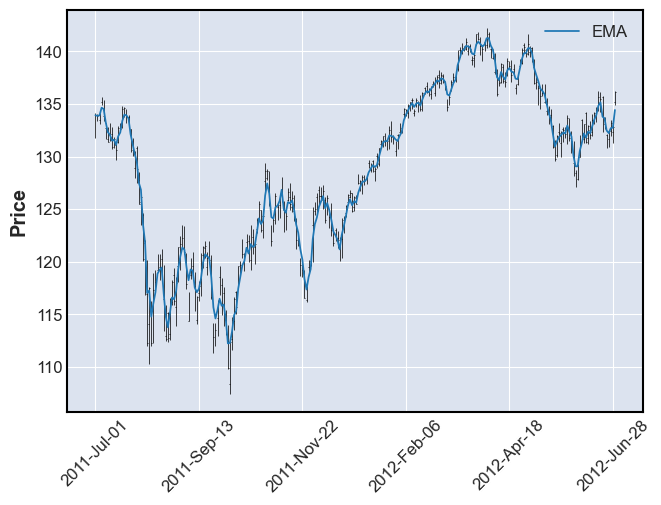

In [54]:
add_drawing=mlf.make_addplot(data['Close'].ewm(alpha=0.5,adjust=False).mean(),type='line',label='EMA')
mlf.plot(data,addplot=add_drawing)

#### 2.MACD
MACD=EMA(12)-EMA(26)<br>
Signal=EMA(MACD,9)<br>
Histogram=MACD-signal<br>
Note:Fail to recognize its exact meanings?

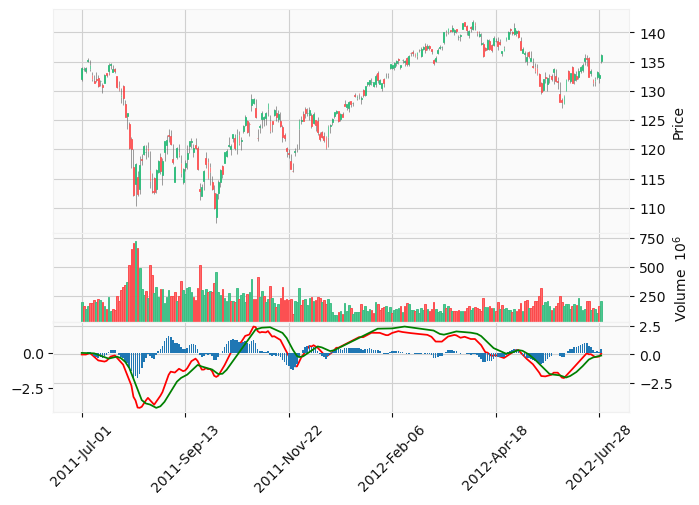

In [55]:
Ema12=data['Close'].ewm(span=12,adjust=False).mean()
Ema26=data['Close'].ewm(span=26,adjust=False).mean()
MACD=Ema12-Ema26
Signal=MACD.ewm(span=9,adjust=False).mean()
Histogram=MACD-Signal

drawing_list=[
    mlf.make_addplot(MACD,type='line',panel=2,color='r'),
    mlf.make_addplot(Signal,type='line',panel=2,color='g'),
    mlf.make_addplot(Histogram,type='bar',panel=2)
]
mlf.plot(data,addplot=drawing_list,volume=True,type='candle',style='yahoo')

### 总结应用
如果还需要进一步修改图像，那么应该直接使用returnfig标签，进而获得fig,axes,随后使用matplotlib方法进行编写。注意返回的
axes是一个ax的列表，分别代表了从top到bottom的不同panel的图像的坐标轴，每一个ax都可以调用对应的yaxis和xaxis。<br>
matplotlib对象具体对应如下：
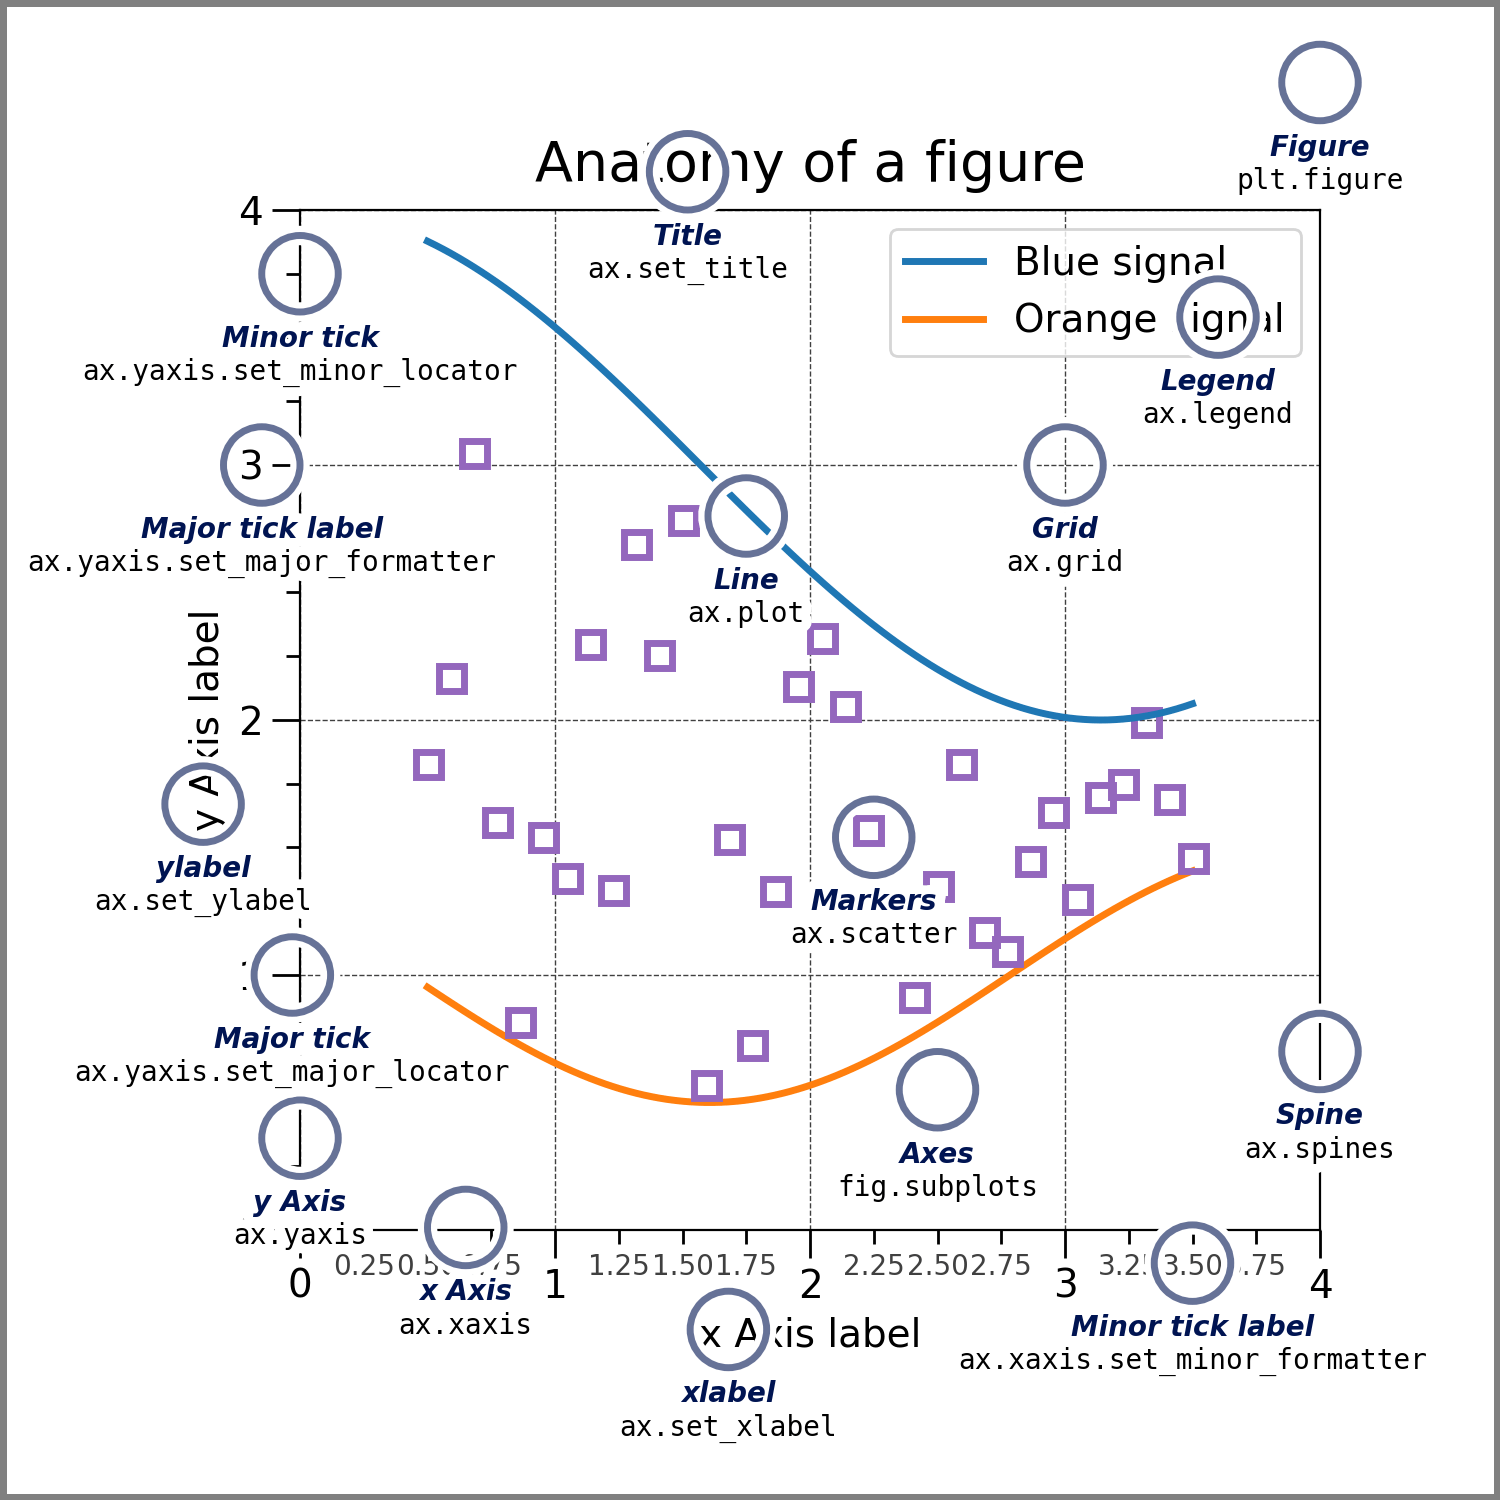

In [56]:
def get_macd_colors(data):
    colors=[]
    for i in range(len(data)):
        if data[i]<0:
            colors.append("#26A69A")  
        elif data[i]>0:
            colors.append("#FF5252") 
        else:
            colors.append("#F0FFFF")
    
    return colors     


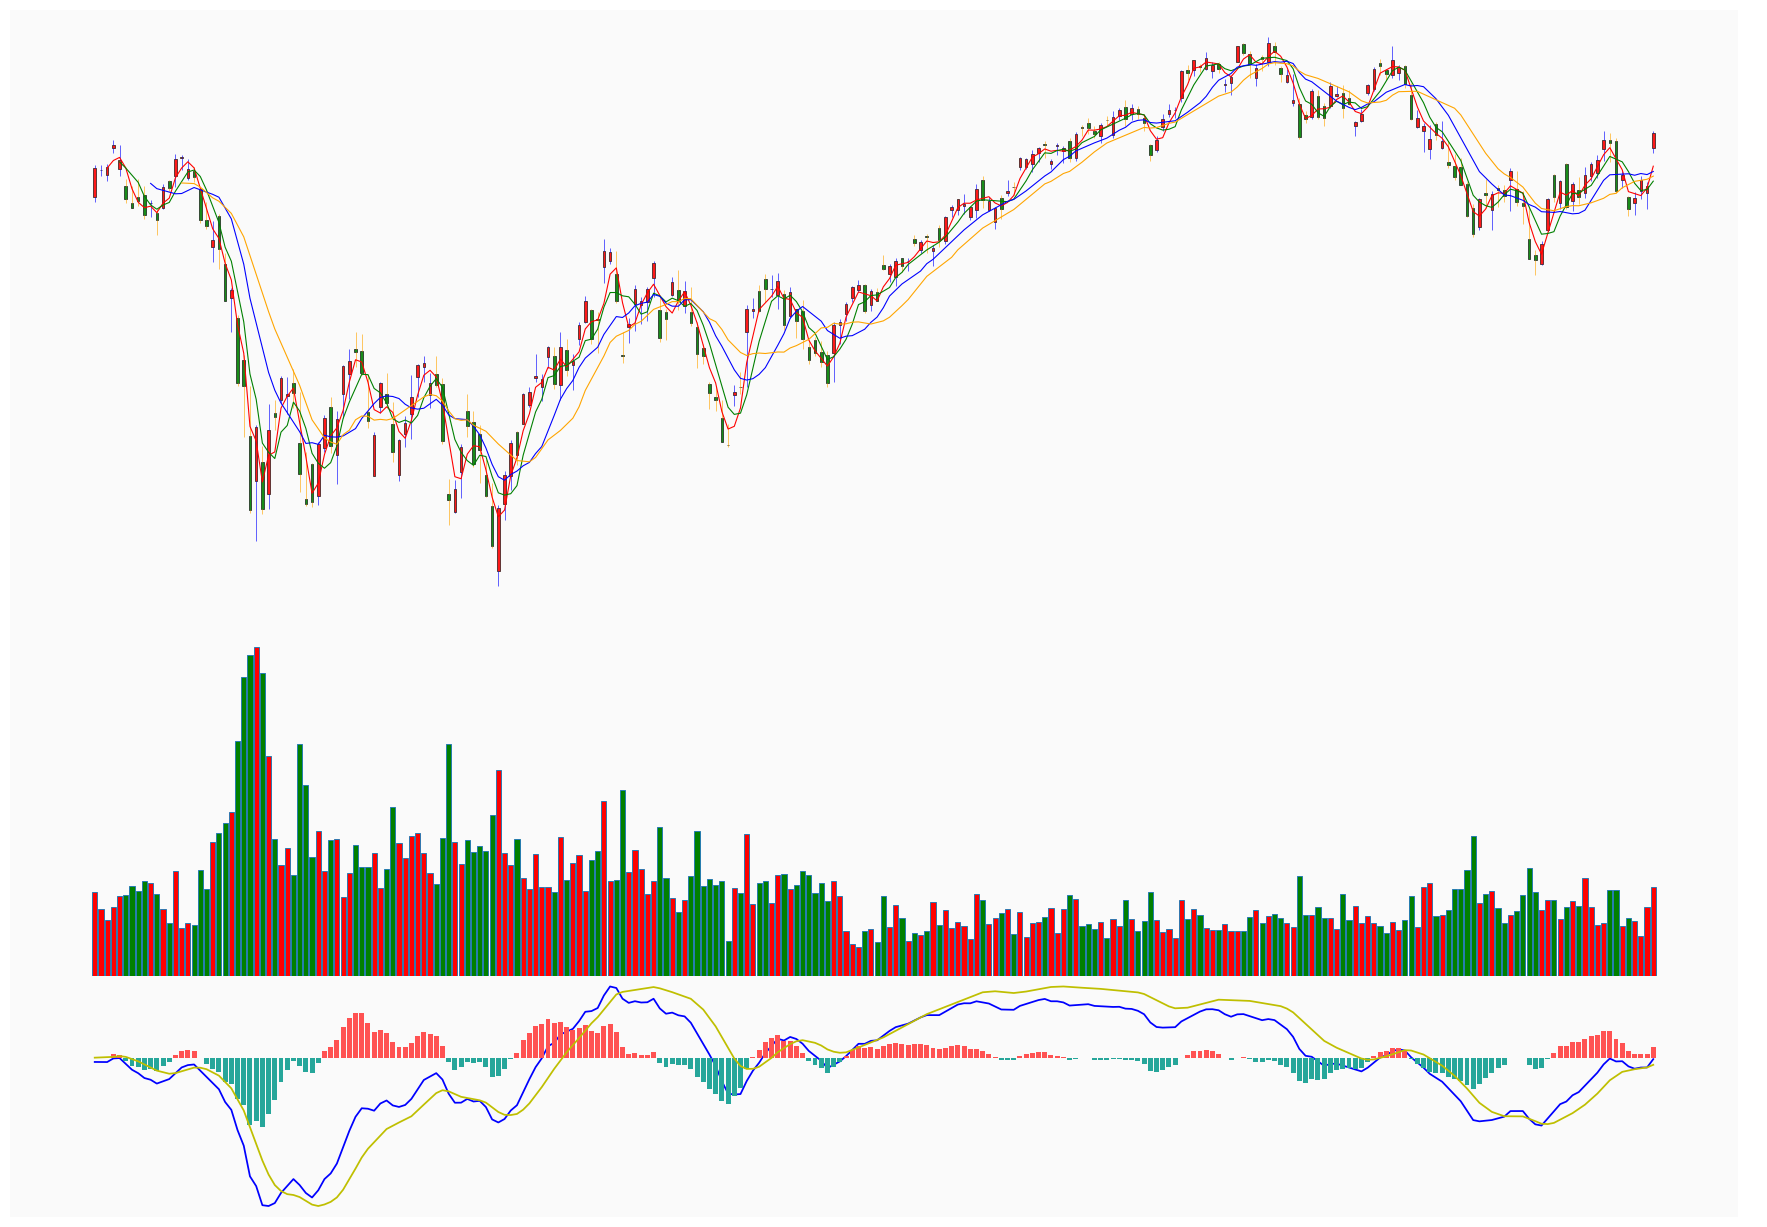

In [60]:
Ema12=data['Close'].ewm(span=12,adjust=False).mean()
Ema26=data['Close'].ewm(span=26,adjust=False).mean()
MACD=Ema12-Ema26
Signal=MACD.ewm(span=9,adjust=False).mean()
Histogram=MACD-Signal
Histogram.columns=['Macd']

mc=mlf.make_marketcolors(up='r',down='g',wick={'up':'blue','down':'orange'},volume={'up':'r','down':'g'})
s=mlf.make_mpf_style(base_mpf_style='yahoo',marketcolors=mc,mavcolors=['r','g','b','orange'],gridstyle='')

drawing_list=[
    mlf.make_addplot(MACD,type='line',panel=2,color='b'),
    mlf.make_addplot(Signal,type='line',panel=2,color='y'),
    mlf.make_addplot(Histogram,type='bar',panel=2,color=get_macd_colors(Histogram))
]
fig,axes=mlf.plot(
    data,type='candle',mav=(3,5,10,15),
    volume=True,xlabel="",ylabel="",
    style=s,ylabel_lower="",addplot=drawing_list,
    figscale=3,returnfig=True,panel_ratios=(5,3,2)
)
axes[0].yaxis.set_ticks([])
axes[2].yaxis.set_ticks([])
axes[2].set_ylabel(" ")
axes[4].yaxis.set_ticks([])
axes[4].spines['bottom'].set_color('none')
axes[5].xaxis.set_ticks([])
axes[5].yaxis.set_ticks([])
for i in range(6):
    axes[i].spines[['top','bottom','left','right']].set_visible(False)
plt.savefig("test.png")
mlf.show()